In [1]:
import matplotlib.pyplot as plt
import numpy as np
from qutip import (Qobj, sesolve, ket2dm)

In [87]:
##define all of the parameters
Delta0 = 1
Delta1 = 1
Delta2 = 0
Delta3 = 1
Alpha10 = 10
Alpha23 = 1
Alpha30 = 10
Alpha12 = 1
Phi =  np.pi *0

##define the basis states
Zero = Qobj([[1], [0], [0], [0]])
One = Qobj([[0], [1], [0], [0]])
Two = Qobj([[0], [0], [1], [0]])
Three = Qobj([[0], [0], [0], [1]])
Minus = (Alpha23* One - Alpha12 * Three) / np.sqrt(Alpha12**2 + Alpha23**2)
Plus = (Alpha23* One + Alpha12 * Three) / np.sqrt(Alpha12**2 + Alpha23**2)

##define the Hamiltonian
H = Qobj([
    [Delta0, Alpha10, 0, Alpha30*np.exp(-1j*Phi)],
    [Alpha10, Delta1, Alpha12, 0],
    [0, Alpha12, 0, Alpha23],
    [Alpha30*np.exp(1j * Phi), 0, Alpha23, Delta3]
])

In [88]:
#Simulate

# list of times for which the solver should store the state vector
tlist = np.linspace(0, 10, 1001)

#convert to density matrices
dmZero = ket2dm(Zero)
dmOne = ket2dm(One)
dmTwo = ket2dm(Two)
dmThree = ket2dm(Three)

dmStates = [dmZero,dmOne,dmTwo,dmThree]

Results = []
for i in range(np.size(dmStates)):
    Results.append(sesolve(H, Minus, tlist, e_ops=[dmStates[i]])) #finding the expectation value of dmStates[i]

#get an array of the probabilities of being in each state
Probs = []
for i in range(np.size(Results)):
    Probs.append(Results[i].expect[0])

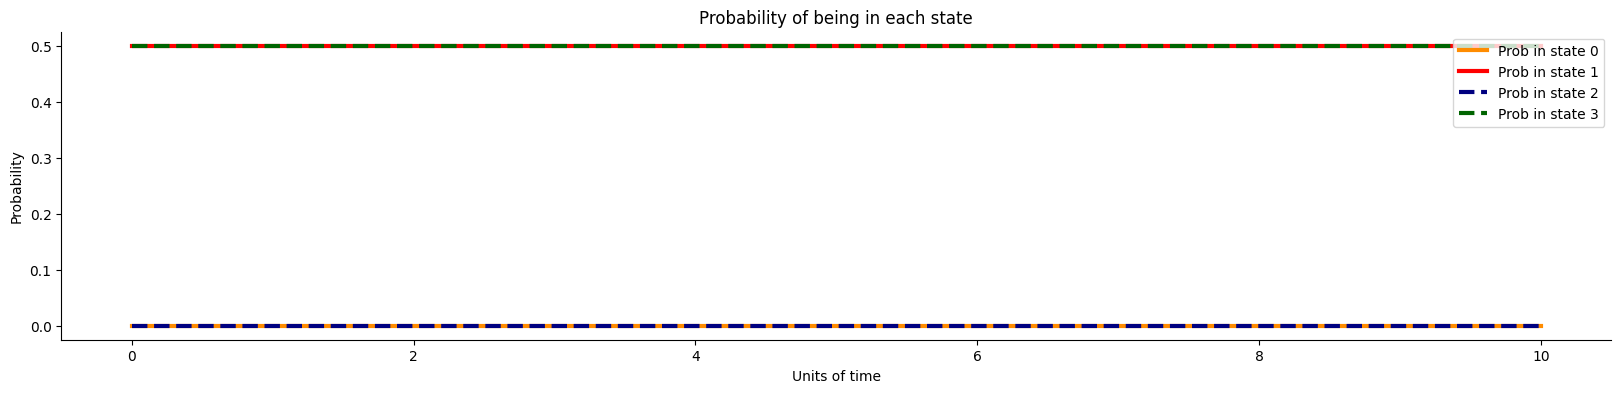

In [96]:
#in the Minus, Two, Plus basis
plt.figure(figsize=(20,4))

plt.plot(tlist,Probs[0], color='darkorange', label = 'Prob in state 0', linestyle='-', linewidth = 3)
plt.plot(tlist,Probs[1], color='red', label = 'Prob in state 1', linestyle='-', linewidth = 3)
plt.plot(tlist,Probs[2], color='navy', label = 'Prob in state 2', linestyle='--', linewidth = 3)
plt.plot(tlist,Probs[3], color='darkgreen', label = 'Prob in state 3', linestyle='--', linewidth = 3)

# Set the plot free
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.legend(loc='upper right')
plt.title('Probability of being in each state')
plt.ylabel('Probability')
plt.xlabel('Units of time')
plt.show()